In [1]:
import os

from random_agent import RandomAgent

from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import numpy as np
import cnn_environment
import cnn_environment_previous_actions

current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
data_path = os.path.join(parent_path, "data_new")

env = cnn_environment.TestEnvironment2((224, 224), 15, data_path, render_mode = 'human')
env_prevois_actions = cnn_environment_previous_actions.TestEnvironment2((224, 224), 15, data_path, render_mode = 'human')
random_agent = RandomAgent(env)

/Users/nicoberlaender/Development/ADLR/Reinforcement_Learning/cnn_environment.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.unet = torch.load("saved_models/model

In [2]:
num_episodes = 100
losses_random = []
similarities_random = []
counter = 0

obs, info = env.reset()
episode_similarities_random = [info['current_similarity']]
episode_losses = [info['current_loss']]
while counter < num_episodes:
    # Get action from the model based on the current observation
    #action, _ = loaded_model.predict(obs, deterministic=False)
    action = random_agent.get_action()
    obs, reward, done, truncated, info = env.step(action)

    episode_similarities_random.append(info['current_similarity'])
    episode_losses.append(info['current_loss'])

    if done or truncated:
        counter += 1
        similarities_random.append(episode_similarities_random)
        losses_random.append(episode_losses)
        obs, info = env.reset()
        episode_similarities_random = [info['current_similarity']]
        episode_losses = [info['current_loss']]

print("All episodes completed. Exiting...")

env.close()

All episodes completed. Exiting...


In [3]:
# Run ID
model_id = "200kJaccard1e-3PreviousActions.zip" 

# Model path
model_path = f"models/{model_id}"

# Load the model
loaded_model = PPO.load(model_path)

num_episodes = 100
losses_ppo = []
similarities_ppo = []
counter = 0

obs, info = env_prevois_actions.reset()
episode_similarities = [info['current_similarity']]
episode_losses = [info['current_loss']]
while counter < num_episodes:
    # Get action from the model based on the current observation
    action, _ = loaded_model.predict(obs, deterministic=False)
    obs, reward, done, truncated, info = env_prevois_actions.step(action)

    episode_similarities.append(info['current_similarity'])
    episode_losses.append(info['current_loss'])

    if done or truncated:
        counter += 1
        similarities_ppo.append(episode_similarities)
        losses_ppo.append(episode_losses)
        obs, info = env_prevois_actions.reset()
        episode_similarities = [info['current_similarity']]
        episode_losses = [info['current_loss']]

print("All episodes completed. Exiting...")

env_prevois_actions.close()

/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(
/Users/nicoberlaender/Development/ADLR/.conda/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() argument 13 must be str, not int
  warnings.warn(


All episodes completed. Exiting...


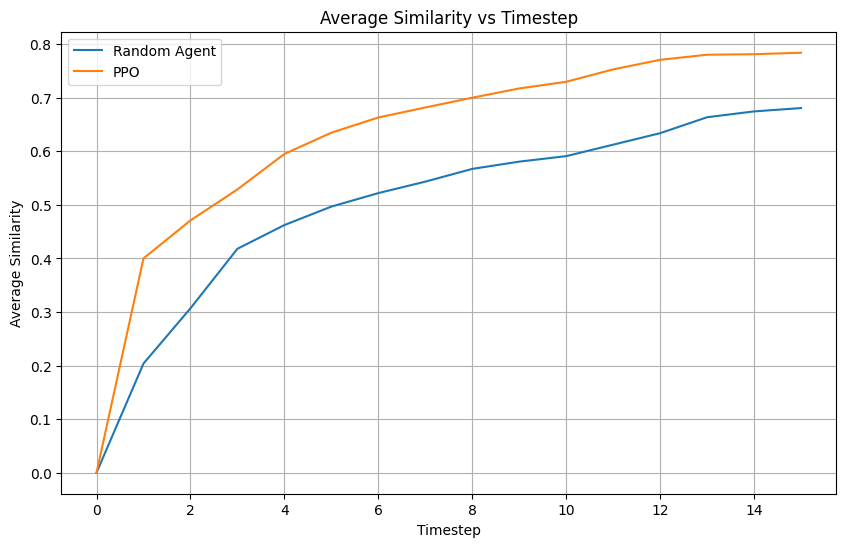

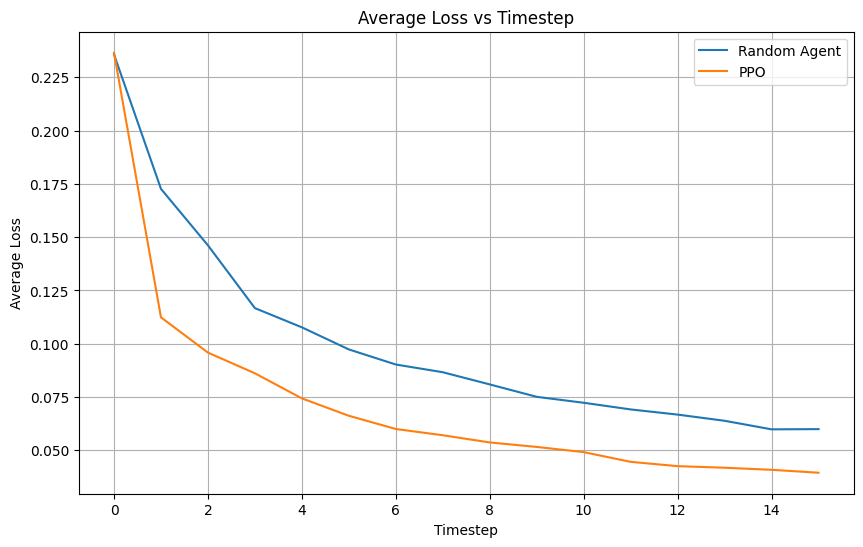

In [4]:
average_similarities_random = np.nanmean(similarities_random, axis=0)
average_similarities_ppo = np.nanmean(similarities_ppo, axis=0)

# Create timestep array
timesteps = range(len(average_similarities_random))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(timesteps, average_similarities_random)
plt.plot(timesteps, average_similarities_ppo)
plt.xlabel('Timestep')
plt.ylabel('Average Similarity')
plt.title('Average Similarity vs Timestep')
plt.legend(['Random Agent', 'PPO'])
plt.grid(True)
plt.show()

# Similar process for losses
average_losses_random = np.nanmean(losses_random, axis=0)
average_losses_ppo = np.nanmean(losses_ppo, axis=0)

# Plot losses
plt.figure(figsize=(10, 6))
plt.plot(timesteps, average_losses_random)
plt.plot(timesteps, average_losses_ppo)
plt.xlabel('Timestep')
plt.ylabel('Average Loss')
plt.title('Average Loss vs Timestep')
plt.legend(['Random Agent', 'PPO'])
plt.grid(True)
plt.show()

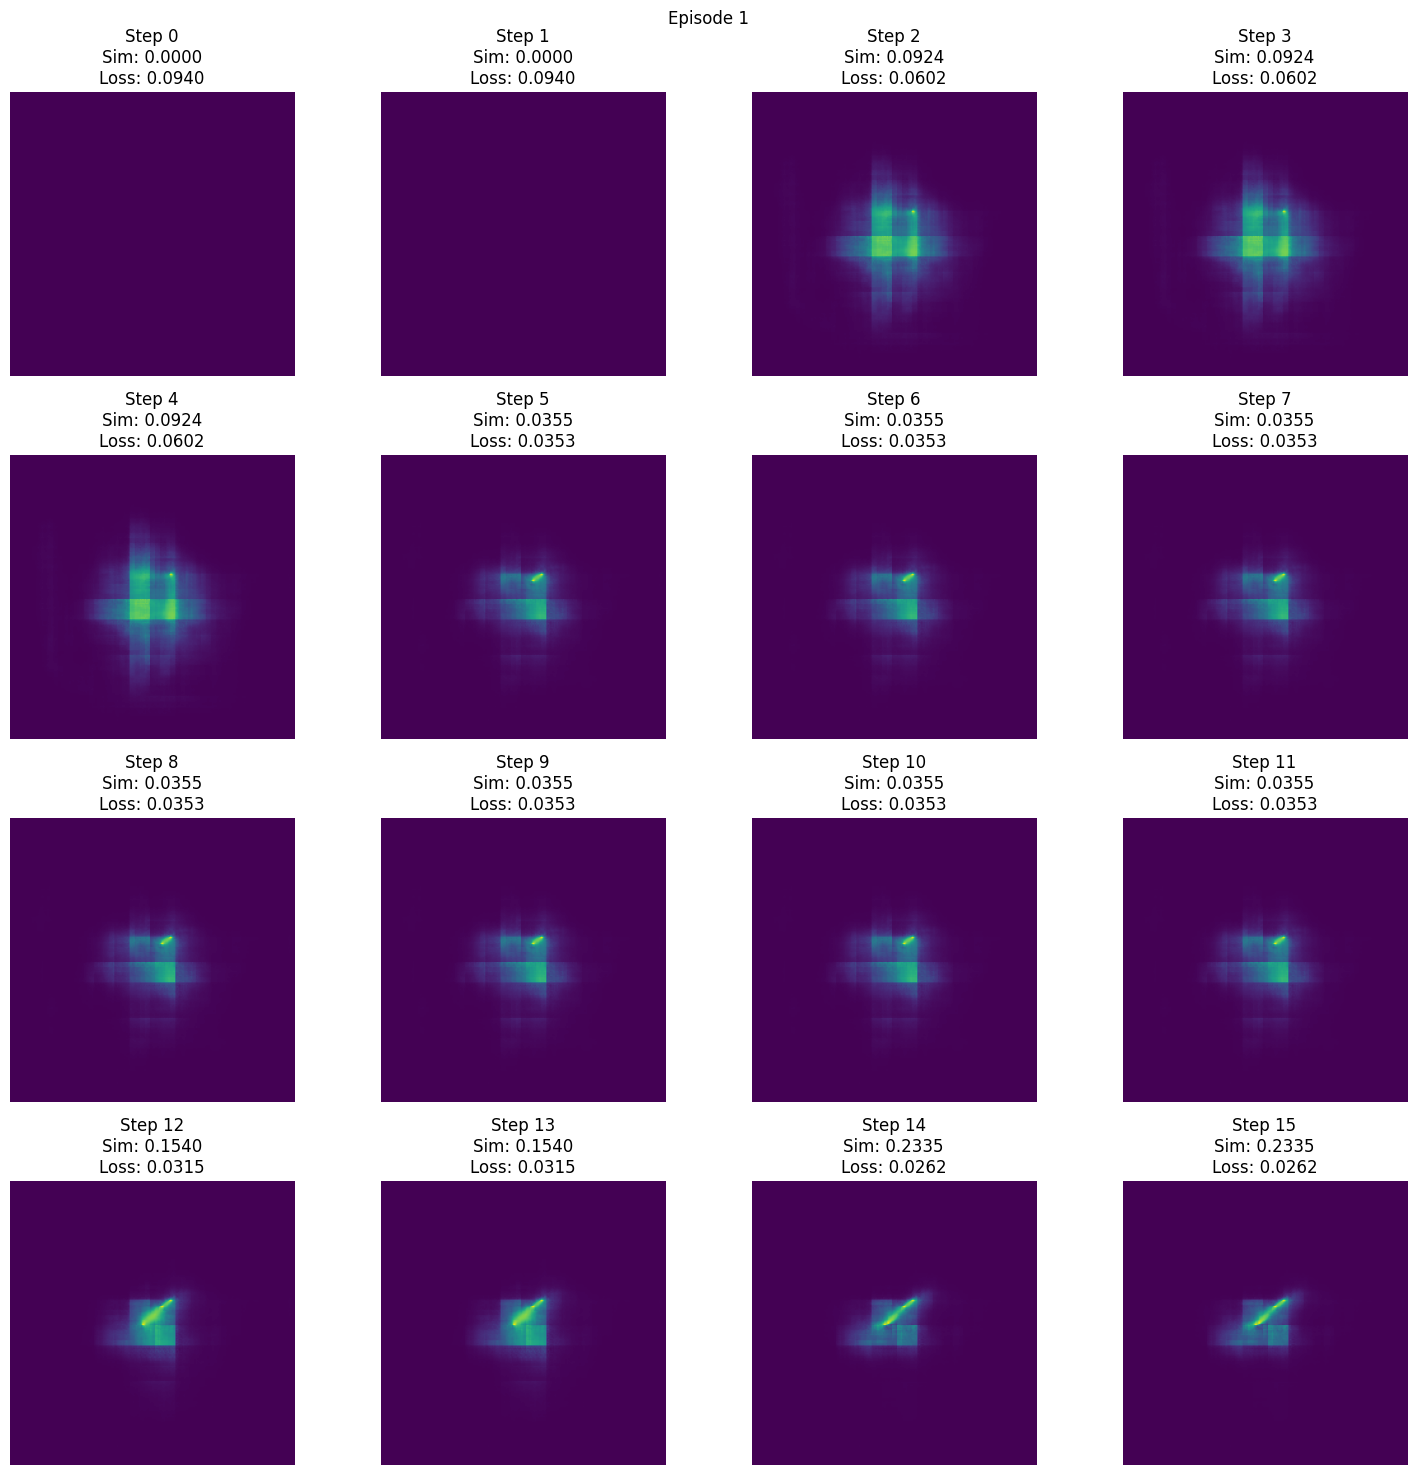

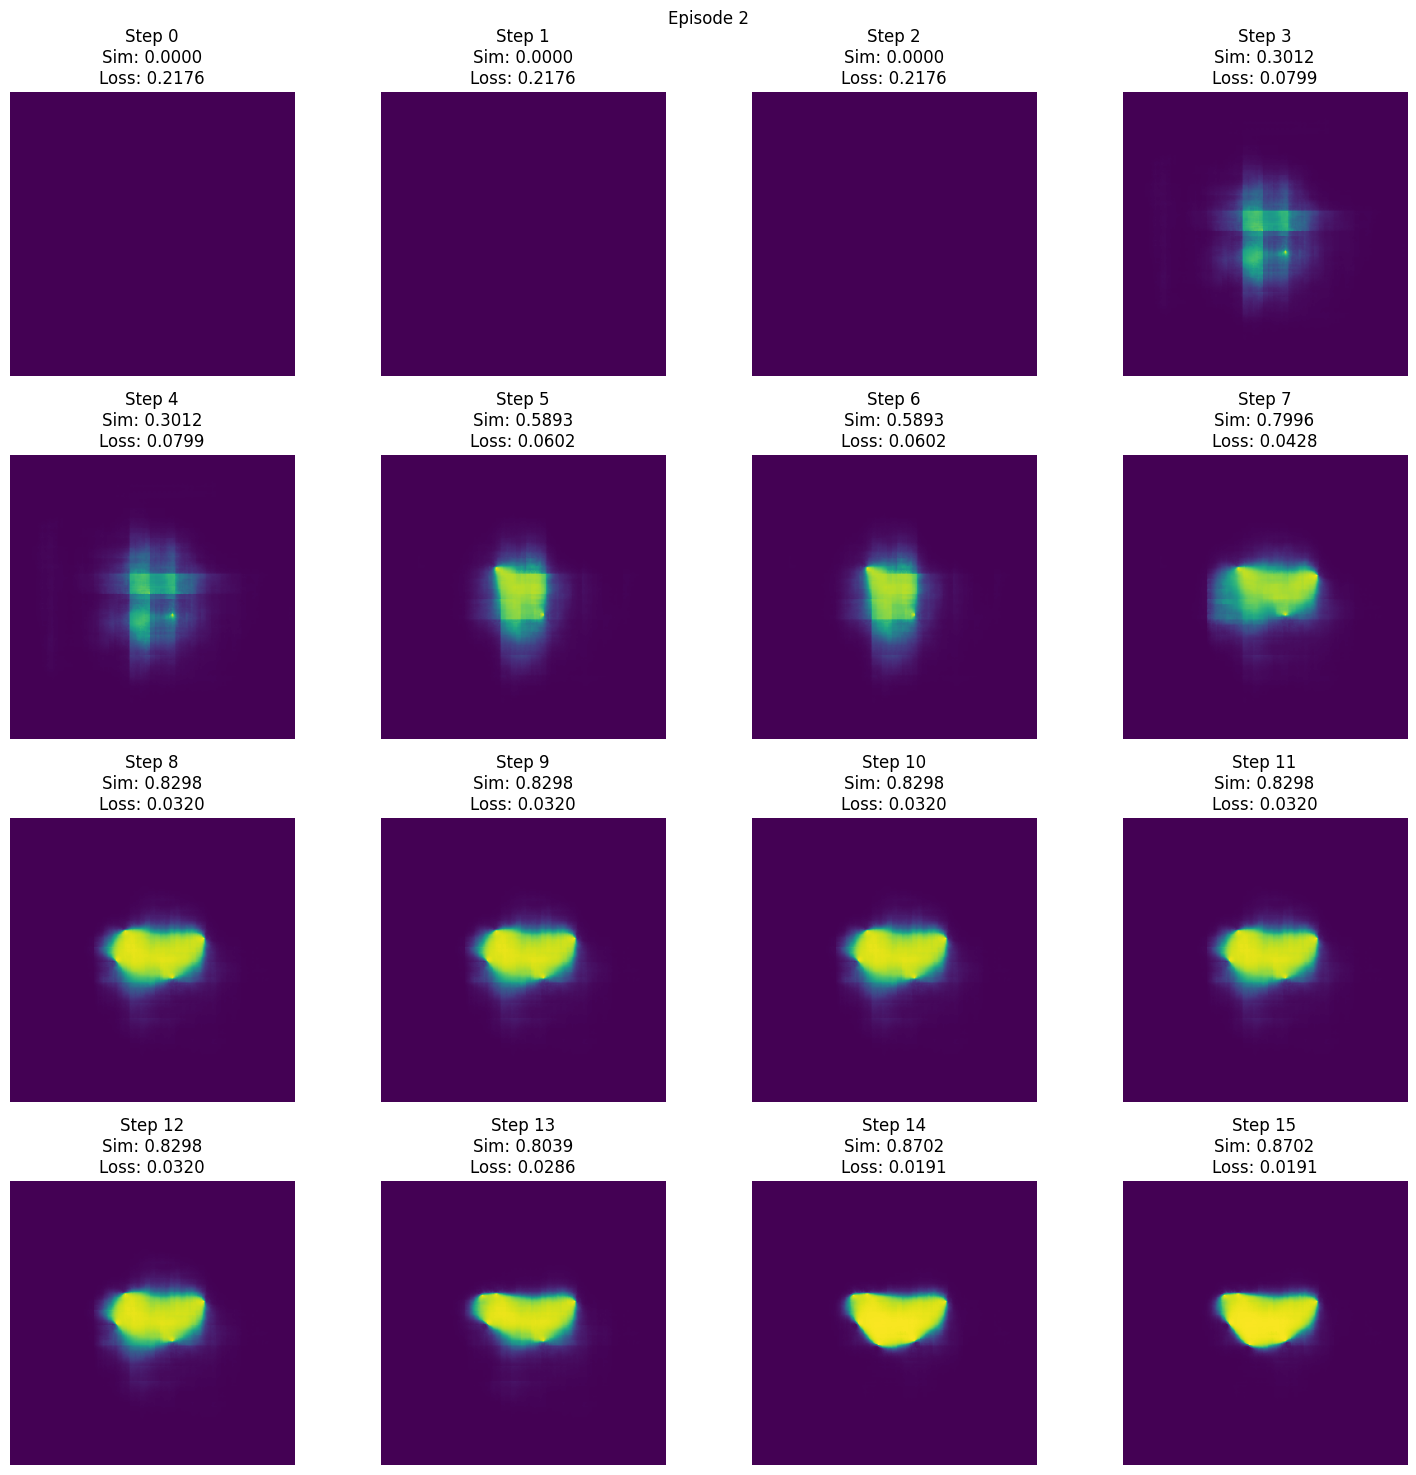

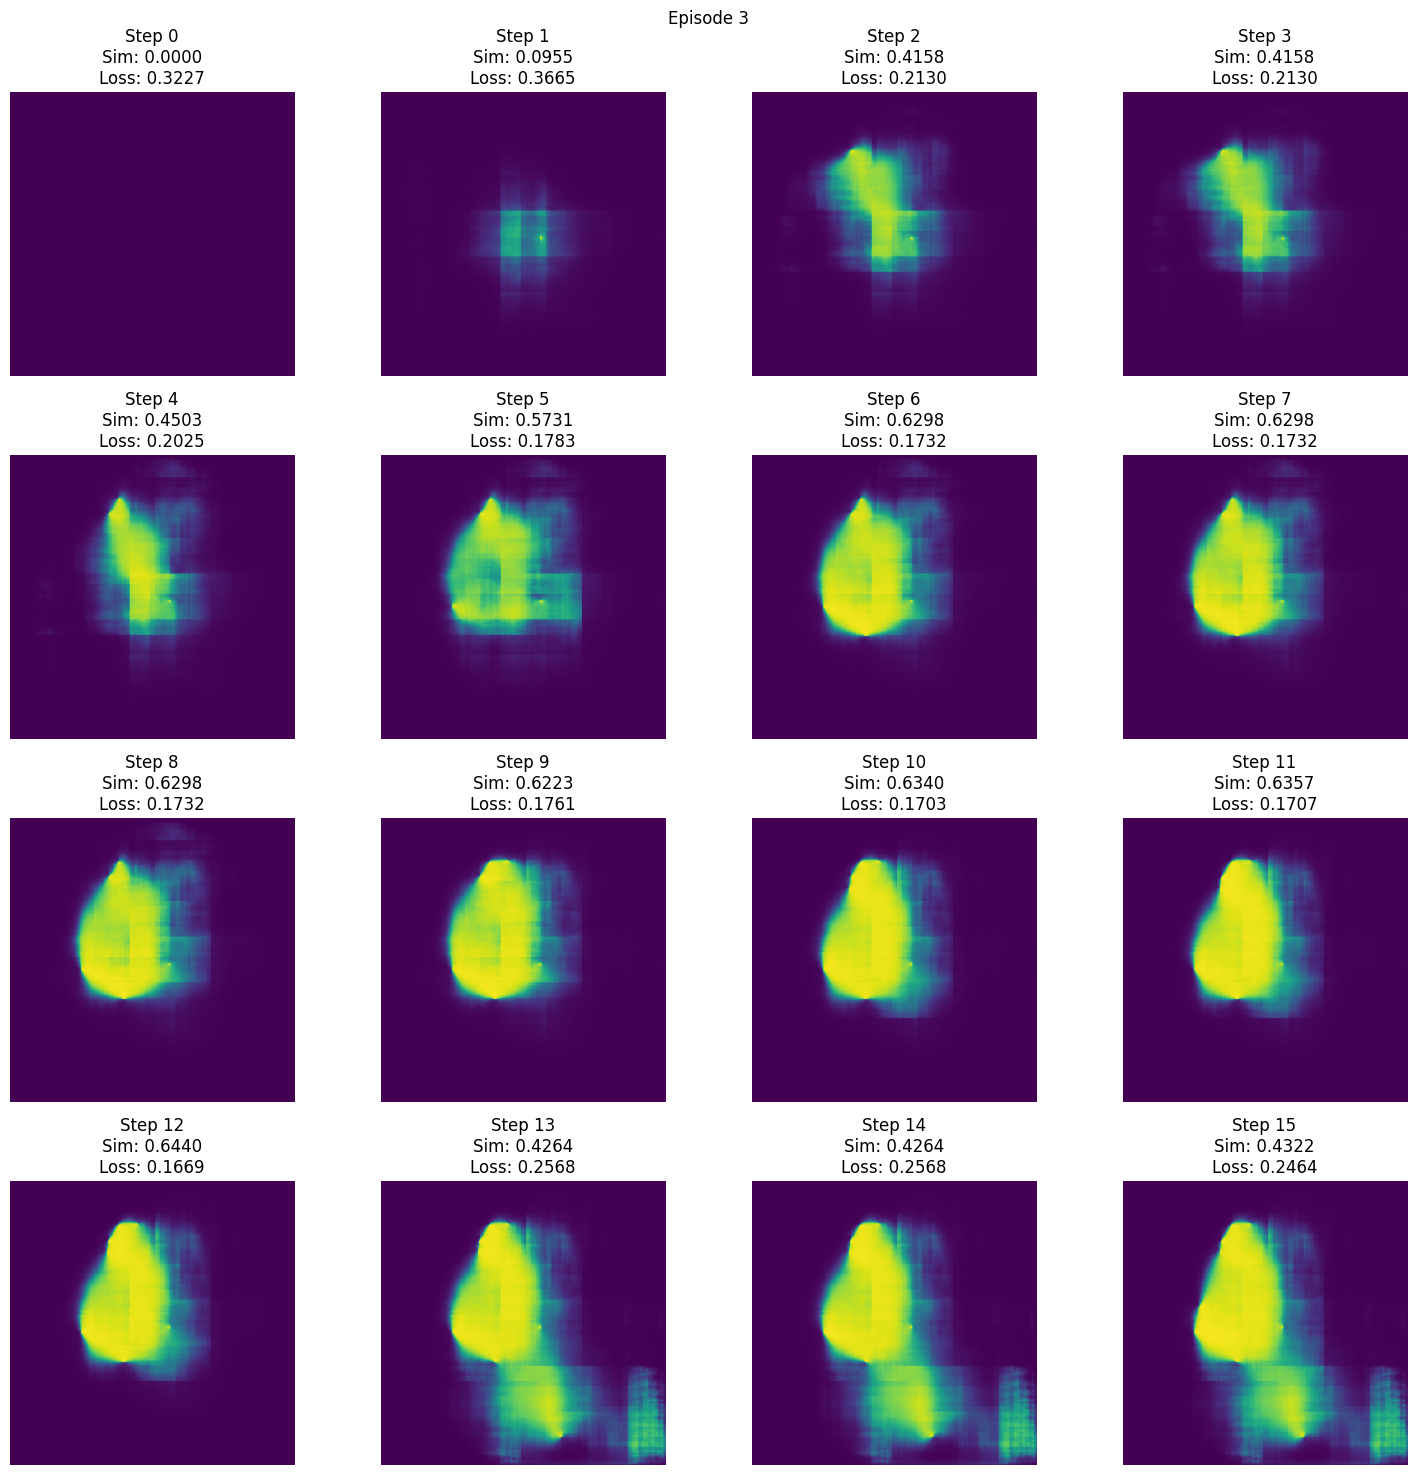

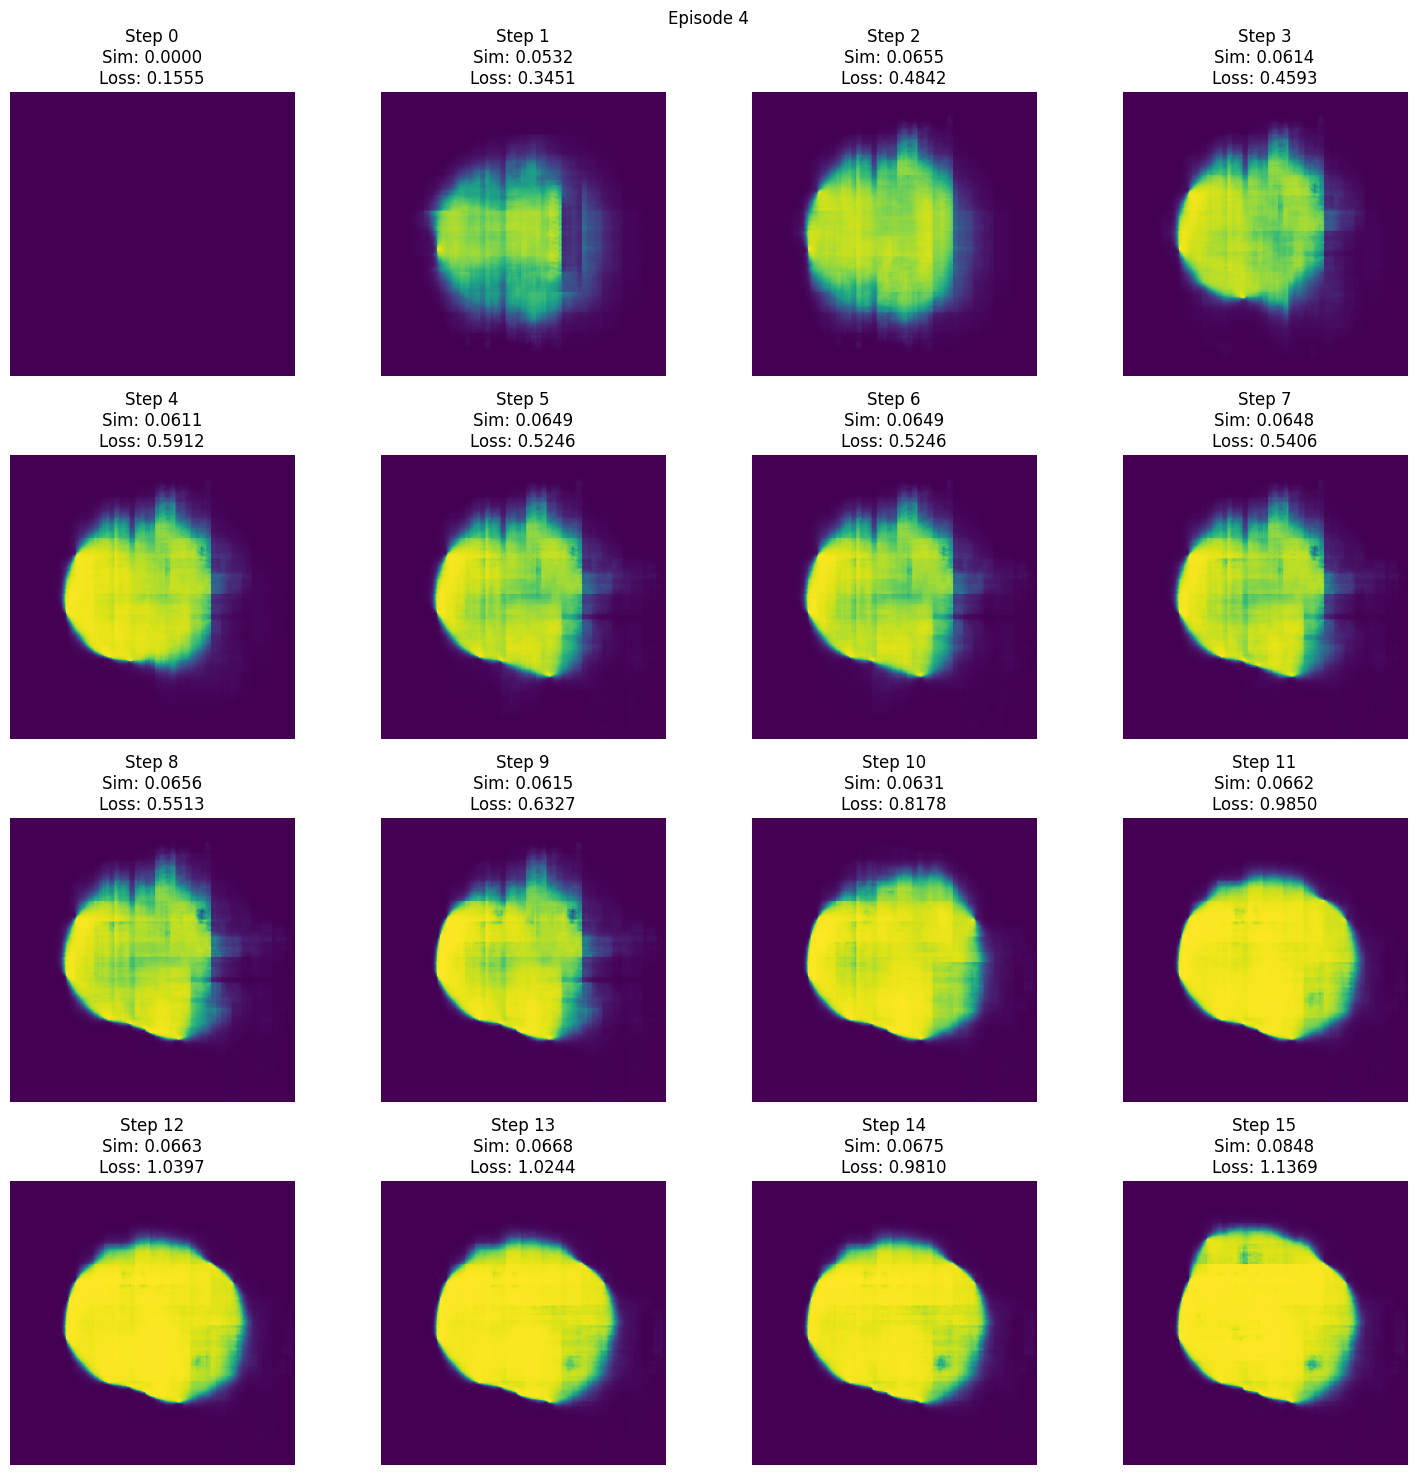

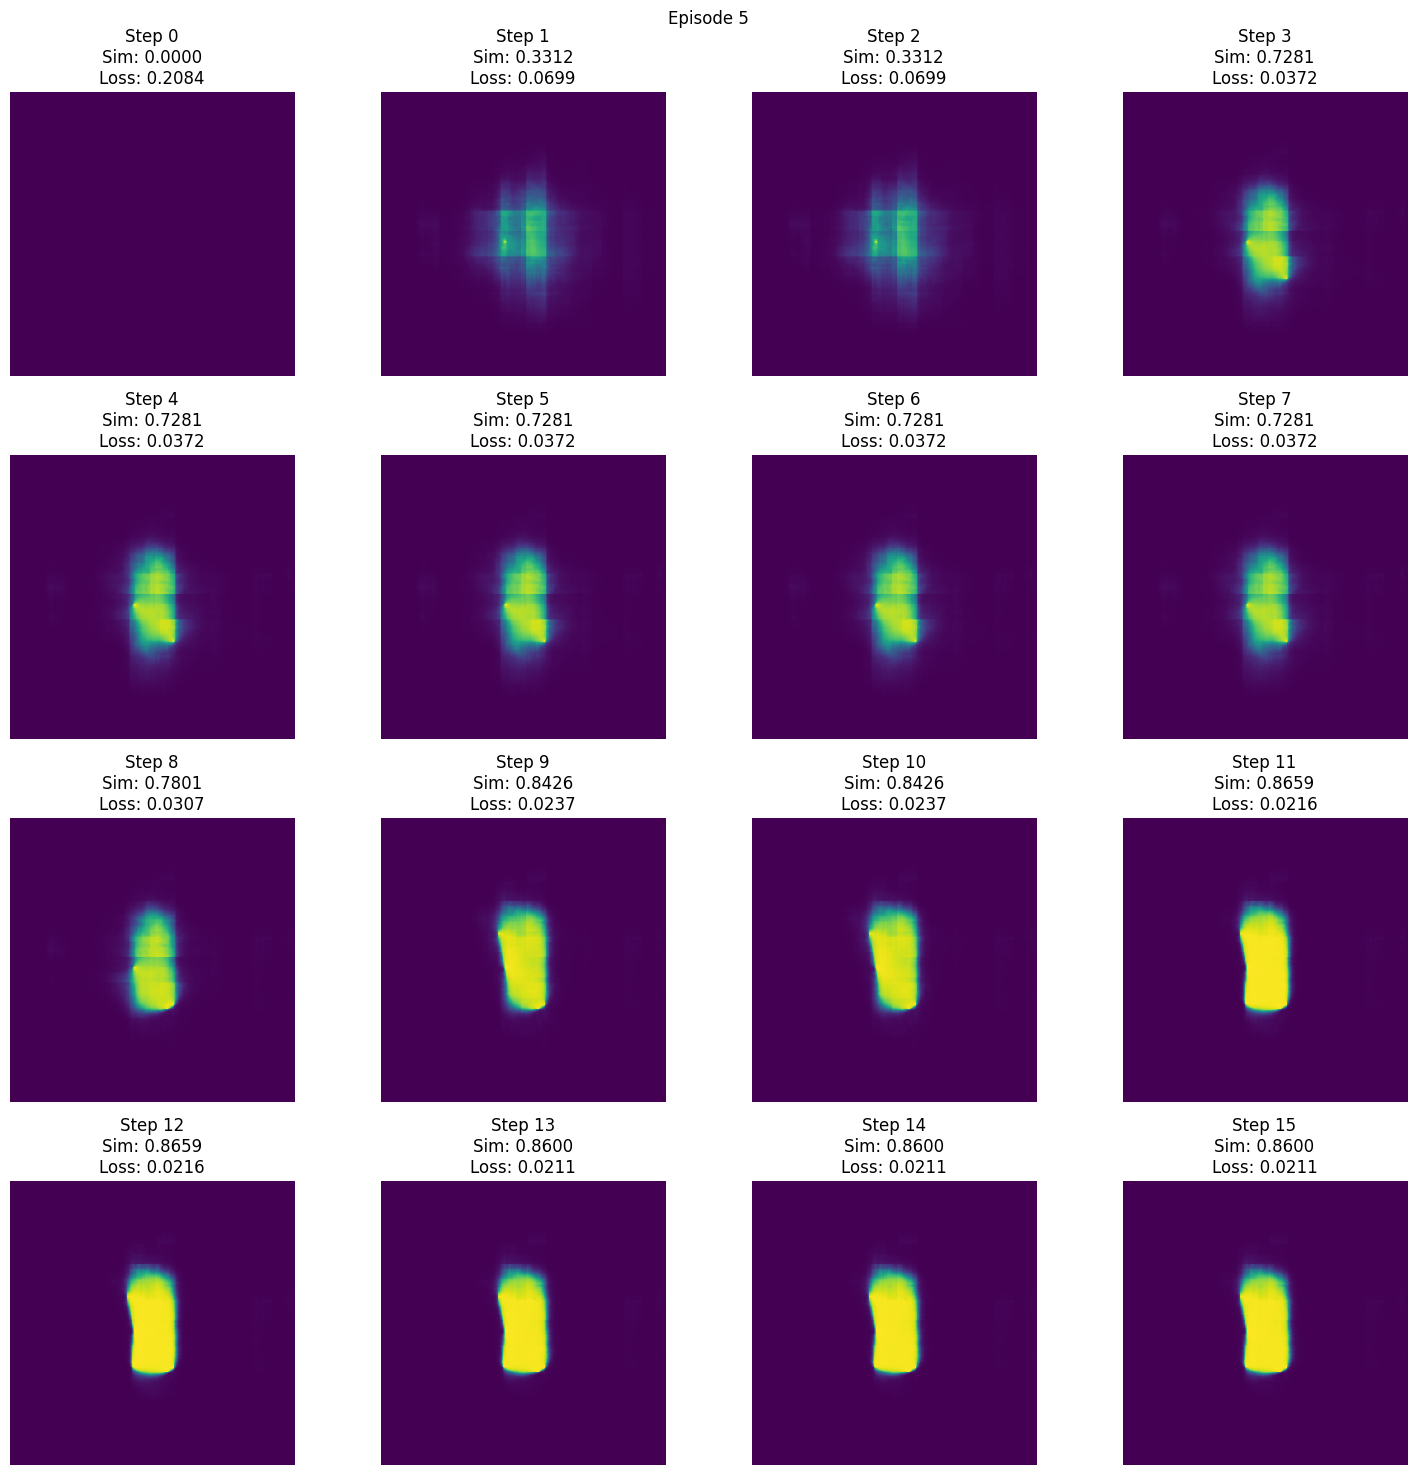

All episodes completed. Exiting...


In [5]:
num_episodes = 5  # Increased number of episodes
losses = []
similarities = []
counter = 0

obs, info = env.reset()

while counter < num_episodes:
    episode_images = [obs['image'].squeeze()]  # Store images for current episode
    episode_similarities = [info['current_similarity']]
    episode_losses = [info['current_loss']]
    
    while True:
        action = random_agent.get_action()
        obs, reward, done, truncated, info = env.step(action)
        
        episode_images.append(obs['image'].squeeze())
        episode_similarities.append(info['current_similarity'])
        episode_losses.append(info['current_loss'])
        
        if done or truncated:
            break
    
    # After each episode, plot the images and store metrics
    counter += 1
    similarities.append(episode_similarities)
    losses.append(episode_losses)
    
    # Create a grid plot for the current episode
    num_images = len(episode_images)
    n_cols = 4
    n_rows = (num_images + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(episode_images[i])
        plt.title(f'Step {i}\nSim: {episode_similarities[i]:.4f}\nLoss: {episode_losses[i]:.4f}')
        plt.axis('off')
    
    plt.suptitle(f'Episode {counter}')
    plt.tight_layout()
    plt.show()
    
    # Start next episode
    if counter < num_episodes:
        obs, info = env.reset()

print("All episodes completed. Exiting...")
env.close()